In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
import fix_yahoo_finance
from scipy.stats import norm
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

     |████████████████████████████████| 6.3 MB 7.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=40f977c4f57317ef074a56656389e9fab907c7866442ee8062b5b515c9f7e004
  Stored in directory: /tmp/pip-ephem-wheel-cache-jv5a6dxq/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


[*********************100%***********************]  1 of 1 completed


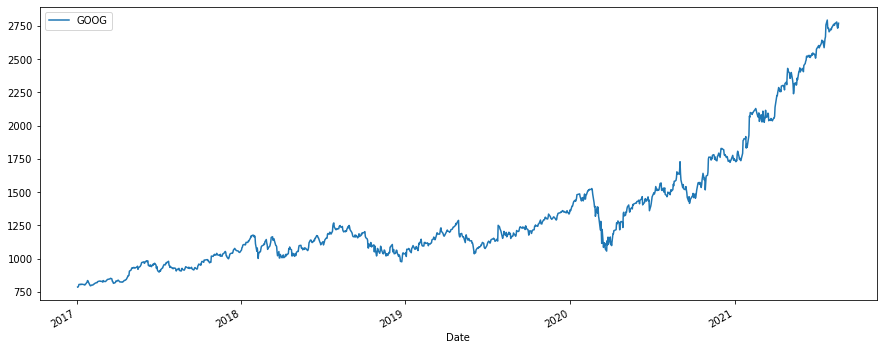

In [3]:
ticker = 'GOOG'
data = pd.DataFrame()
data[ticker] = yf.download(ticker,start = '2017-1-1')['Adj Close']
#Plot
data.plot(figsize=(15,6))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

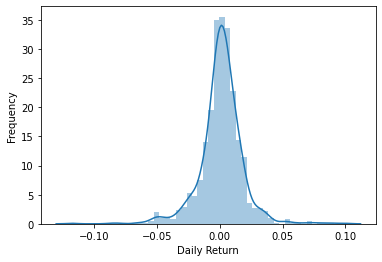

In [4]:
log_returns = np.log(1 + data.pct_change())
#Plot
sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [5]:
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5*var)

In [6]:
stdev = log_returns.std()
days = 50
trials = 10000
Z = norm.ppf(np.random.rand(days, trials)) #days, trials
daily_returns = np.exp(drift.values + stdev.values * Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


 ...]

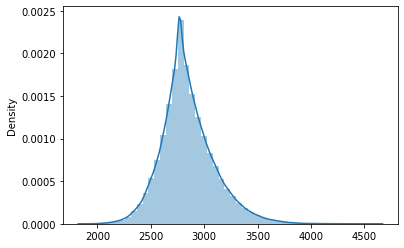

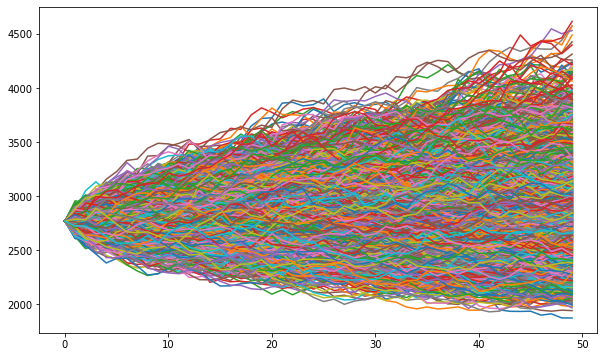

In [7]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = data.iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]
sns.distplot(price_paths)
plt.figure(figsize=(10,6))
plt.plot(price_paths)
